<a href="https://drive.google.com/file/d/1b7tSyJBpWggHEBGdWa80JdKh7VNq2FEf/view?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1
samples = [rng() for _ in range(1000)]

### Problem 1
Implement serial test and apply to a `samples`

In [ ]:
def serial_test(samples):
    k = 20
    pair = np.array([(samples[i], samples[i + 1]) for i in range(0, len(samples), 2)])
    x, y = zip(*pair)
    f_obs = np.histogram2d(x, y, bins=[np.linspace(0, 1, k+1), np.linspace(0, 1, k+1)])[0]
    n_exp = np.sum(f_obs) / (f_obs.shape[0] * f_obs.shape[1])
    f_exp = np.full(f_obs.shape, n_exp)
    return stats.chisquare(f_obs.flatten(), f_exp.flatten())

serial_test(samples)

Power_divergenceResult(statistic=np.float64(391.2), pvalue=np.float64(0.6003664860752091))

### Permutation test

### Problem 2*
Implement permutation test and apply to a `samples`

In [10]:
from itertools import permutations
def permutation_test(samples, d):
    samples = samples[:len(samples) - len(samples) % d]
    all_permutations = list(permutations(range(d)))
    permutation_counts = {}
    for permutation in all_permutations:
        permutation_counts[permutation] = 0

    series = np.array(samples).reshape(-1, d)
    for sequence in series:
        sorted_indices = np.argsort(sequence)
        permutation = tuple(sorted_indices)
        permutation_counts[permutation] += 1

    f_obs = np.array(list(permutation_counts.values()))
    f_exp = np.full(len(f_obs), len(series)/ len(all_permutations))
    return stats.chisquare(f_obs, f_exp)

permutation_test(samples, 3)

Power_divergenceResult(statistic=np.float64(4.8558558558558556), pvalue=np.float64(0.4337239950364654))

### Problem 3

Provide a statistical test to show that `rng_bad` has problems but `rng_good` does not.

In [ ]:
def rng_bad(m = 2**31, a = 65539, c = 0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m

def rng_good(m = 2**32, a = 1103515245, c = 12345):
    rng_good.current = (a * rng_good.current + c) % m
    return rng_good.current / m

def comp():
    k = 20
    rng_bad.current = rng_good.current = 1
    bad = [rng_bad() for i in range(100)]
    good = [rng_good() for i in range(100)]

    f_obs_b = np.histogram(bad, np.linspace(0, 1, k + 1))[0]
    f_obs_g = np.histogram(good, np.linspace(0, 1, k + 1))[0]
    f_exp_b = np.full(k, len(bad) // k)
    f_exp_g = np.full(k, len(good) // k)

    print("p_value_bad=  ", stats.chisquare(f_obs_b, f_exp_b)[1])
    print("p_value_good= ", stats.chisquare(f_obs_g, f_exp_g)[1])

comp()

p_value_bad=   0.002898645417280304
p_value_good=  0.26480340432679805


### Problem 4
Simulate a sample of 1000 from a discrete distribution on a set of digits $0, 1, 2, \ldots, 9$ with weights $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

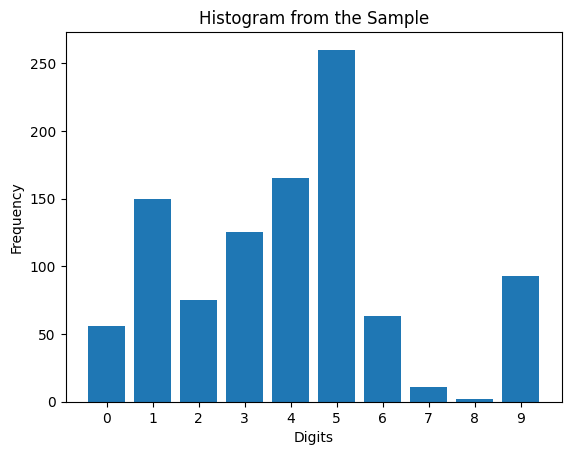

In [ ]:
digits = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
weights = weights / np.sum(weights)

sorted_index = np.argsort(weights)[::-1]
digits = digits[sorted_index]
weights = np.sort(weights)[::-1]

sample = np.random.choice(digits, 1000, p = weights)

plt.hist(sample, bins=np.arange(11)-0.5, rwidth=0.8)
plt.xticks(range(10))
plt.xlabel('Digits')
plt.ylabel('Frequency')
plt.title('Histogram from the Sample')
plt.show()

### Problem 5
Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.

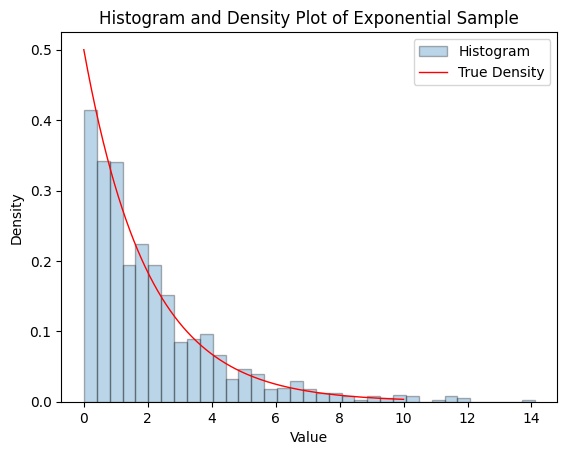

In [ ]:
L = 0.5
uniform_samples = np.random.rand(1000)
exponential_samples = -np.log(1 - uniform_samples) / L
plt.hist(exponential_samples, bins=35, density=True, edgecolor='black', alpha=0.3, label='Histogram')
x = np.linspace(0, 10, 1000)
y = L * np.exp(-L * x)
plt.plot(x, y, color='red', lw=1, label='True Density')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram and Density Plot of Exponential Sample')
plt.legend()
plt.show()

### Problem 6
Justify (orally) that the accept-reject method really samples from the required distribution. Simulate $1000$ points from the distribution with density $e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$. Plot the sampled histogram on the sample and compare it with the plot of the exact density function.

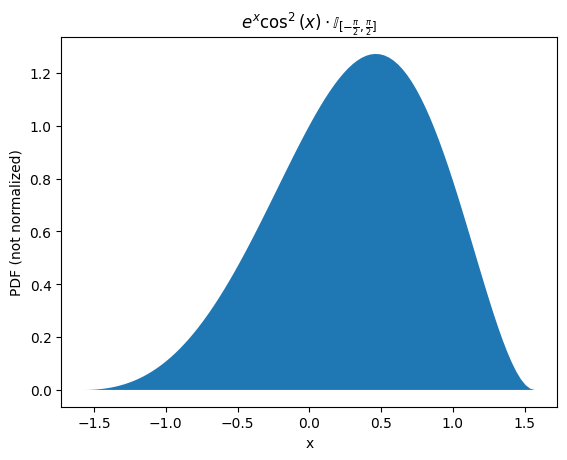

In [ ]:
fig = plt.figure()

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x) * np.cos(x) ** 2 # not normalized density!
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.title(r'$e^x \cos^2(x) \cdot \mathbb{I}_{[-\frac{\pi}{2}, \frac{\pi}{2}]}$')

plt.show()

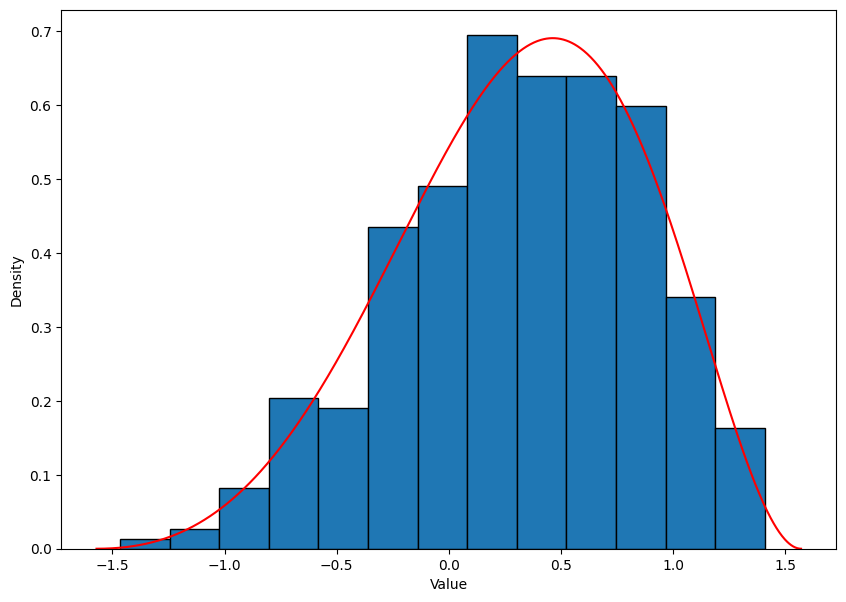

In [ ]:
from scipy.integrate import quad

def density(x):
    return np.exp(x) * np.cos(x)**2

def accept_reject():
    norm, _ = quad(density, - np.pi/2, np.pi/2)
    v = np.random.uniform(- np.pi/2, np.pi/2, 1000)
    u = np.random.uniform(0, 1, 1000)
    sample = v[u < np.exp(v) * np.cos(v)**2 / norm]

    plt.figure(figsize = (10, 7))
    plt.hist(sample, bins = "auto", density = True, edgecolor = 'black')
    x = np.linspace(- np.pi/2, np.pi/2, 1000)
    plt.plot(x, np.exp(x) * np.cos(x)**2 / norm,  color = 'red')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

accept_reject()

### Problem 7
Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

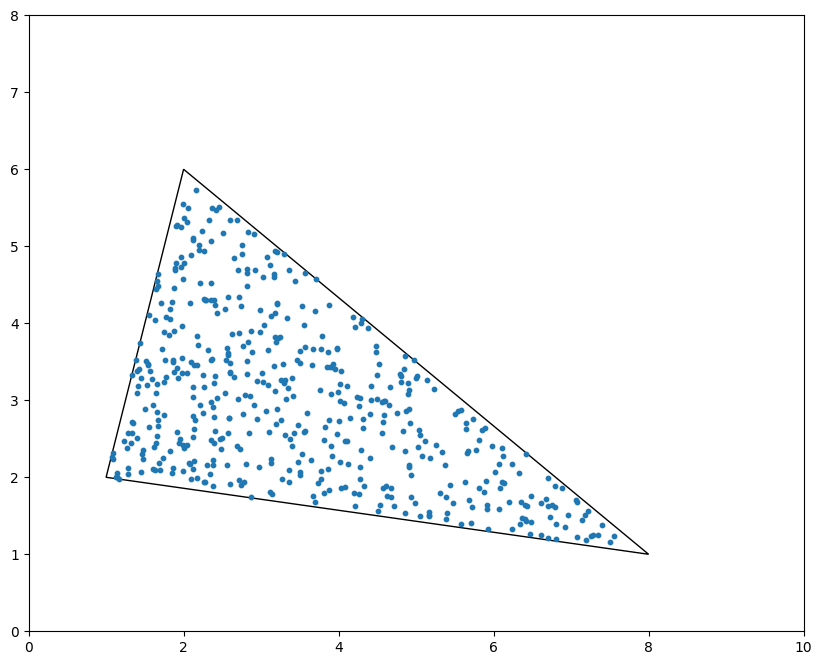

In [18]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

x1, y1 = 1, 2
x2, y2 = 2, 6
x3, y3 = 8, 1
size = 500
rand_array = []

while len(rand_array) <= size:
    x, y = np.random.uniform(1 ,8), np.random.uniform(1, 6)
    a = (x1 - x) * (y2 - y1) - (x2 - x1) * (y1 - y)
    b = (x2 - x) * (y3 - y2) - (x3 - x2) * (y2 - y)
    c = (x3 - x) * (y1 - y3) - (x1 - x3) * (y3 - y)
    if ((a >= 0 and b >= 0 and c >= 0) or (a <= 0 and b <= 0 and c <= 0)):
        rand_array.append ([x, y])

rand_arr = np.array(rand_array)
plt.figure (figsize=(10, 8))
polygon = Polygon(xy=np.array([[1, 2], [2, 6], [8, 1]]), fill = False)
plt.gca().add_artist(polygon)
plt.xlim(0, 10)
plt.ylim(0, 8)
plt.scatter(rand_arr[:, 0], rand_arr[:, 1], s = 10)
plt.show()

### Problem 8
Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

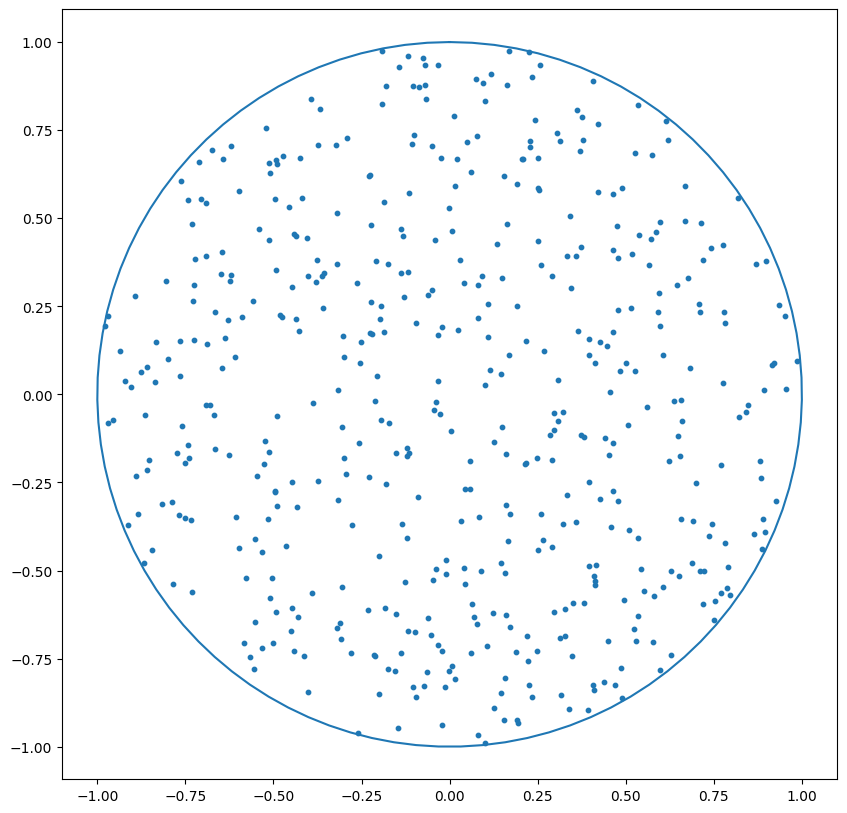

In [9]:
size = 500
f = np.random.uniform(0, 2 * np.pi, size)
r = np.sqrt(np.random.rand(size))
x = r*np.cos(f)
y = r*np.sin(f)

plt.figure (figsize=(10, 10))
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.scatter(x, y, s = 10)
plt.show()

# Random normal generator

In [ ]:
import seaborn as sns

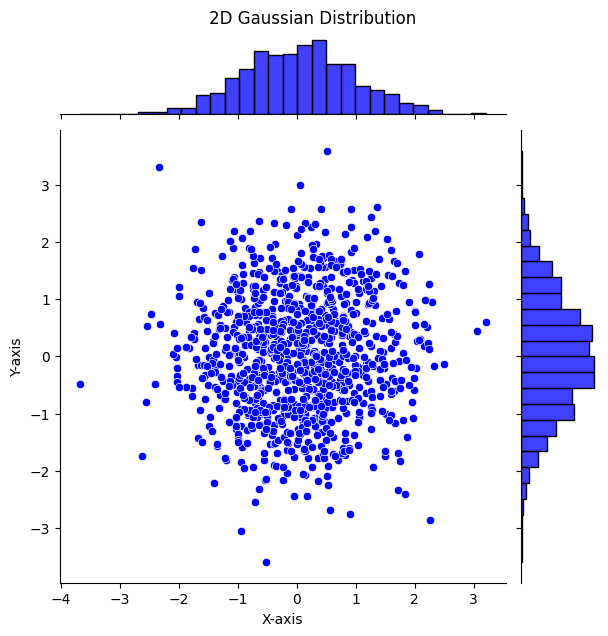

In [ ]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)


joint_plot = sns.jointplot(x=x, y=y, color="blue")
joint_plot.set_axis_labels('X-axis', 'Y-axis')
plt.suptitle('2D Gaussian Distribution', y=1.02)
plt.show()

In [ ]:
# Your code here

In [ ]:
# Your code here

# Basic distributions
- **Uniform distribution $\operatorname{U}[a, b]$**:
$$p(x) = \frac{1}{b-a}\cdot\mathbb{I}_{x\in[a, b]}$$

- **Exponential distribution $\operatorname{Exp}(\lambda)$**:
$$p(x) = \lambda e^{-\lambda x}\cdot\mathbb{I}_{x\geqslant0}$$

- **Normal distribution $\mathcal{N}(\mu, \sigma^2)$**:
$$p(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

- **Gamma distribution $\operatorname{Gamma}(\alpha, \lambda)$**:
$$p(x) = \frac{\lambda^\alpha}{\Gamma(\alpha)}x^{\alpha-1}e^{-\lambda x}\cdot\mathbb{I}_{x\geqslant0}$$

- **Beta distribution $\operatorname{Beta}(\alpha, \beta)$**:
$$p(x) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}\cdot\mathbb{I}_{x\in[0, 1]}$$

- **$\chi^2$ distribution with $k$ degrees of freedom $\chi^2(k)$**:
$$p(x) = \frac{1}{2^{k/2}\Gamma(k/2)}x^{k/2-1}e^{-x/2}\cdot\mathbb{I}_{x\geqslant0}$$



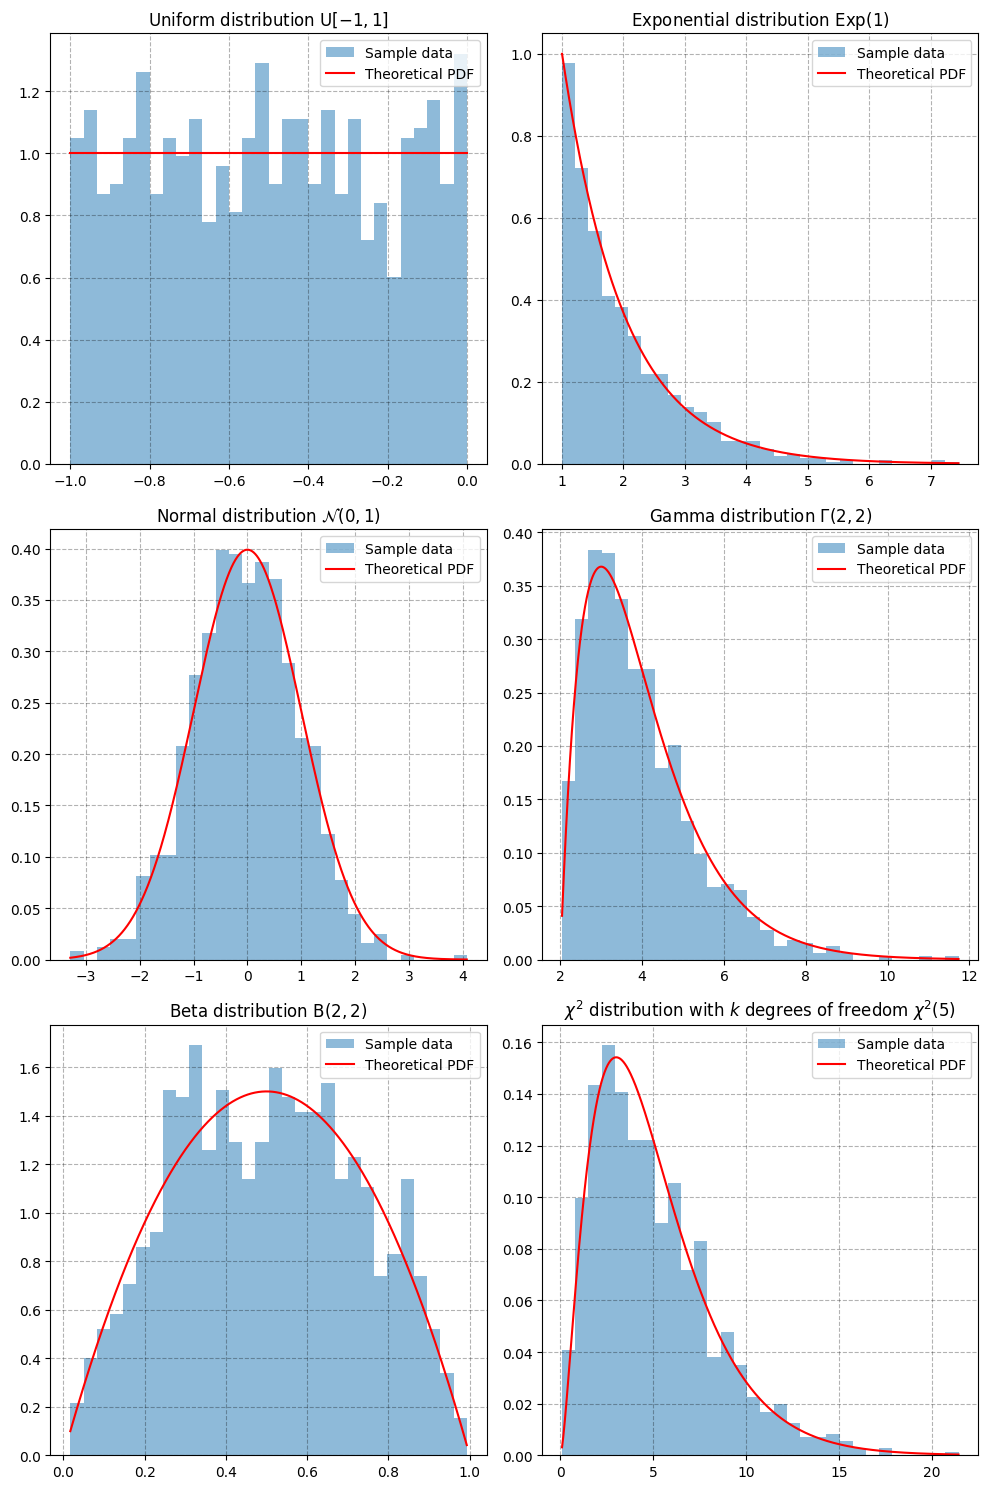

In [ ]:
# Define distributions and their parameters
distributions = [
    ("Uniform distribution $\\operatorname{U}[-1, 1]$", stats.uniform, (-1, 1)),
    ("Exponential distribution $\\operatorname{Exp}(1)$", stats.expon, (1,)),
    ("Normal distribution $\\mathcal{N}(0, 1)$", stats.norm, (0, 1)),
    ("Gamma distribution $\\Gamma(2, 2)$", stats.gamma, (2, 2)),
    ("Beta distribution $\\operatorname{B}(2, 2)$", stats.beta, (2, 2)),
    ("$\\chi^2$ distribution with $k$ degrees of freedom $\\chi^2(5)$", stats.chi2, (5,))
]

# Setup the figure and axes for a 2x3 subplot
fig, axs = plt.subplots(3, 2, figsize=(10, 15))  # Adjust figsize according to your needs
axs = axs.flatten()  # Flatten the array to easily iterate over it

for ax, (name, dist, params) in zip(axs, distributions):
    # Generate sample data
    data = dist.rvs(*params, size=1000)
    # Generate points for PDF
    x = np.linspace(min(data), max(data), 1000)
    pdf = dist.pdf(x, *params)

    # Plot histogram of sample data
    ax.hist(data, bins=30, density=True, alpha=0.5, label='Sample data')
    # Plot theoretical PDF
    ax.plot(x, pdf, 'r-', label='Theoretical PDF')
    ax.set_title(name)
    ax.legend()
    ax.grid(linestyle='--', color='black', alpha=0.3)

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()
